In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv('streamlit_data_anonymous.csv')

/var/folders/95/w1686fhn34zczpnrnccjxvgh0000gn/T/ipykernel_8056/1047840949.py:1: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('streamlit_data_anonymous.csv')


In [9]:
data['num_fairs'].value_counts(dropna=False, normalize=True)

num_fairs
1.0      0.742413
2.0      0.067728
4.0      0.035919
3.0      0.030871
6.0      0.026843
           ...   
152.0    0.000028
120.0    0.000028
92.0     0.000028
65.0     0.000028
46.0     0.000028
Name: proportion, Length: 71, dtype: float64

In [14]:
y = data[data['College_fds_2024'].notnull()].groupby('First Gen')['num_fairs'].value_counts(normalize=True)
y[0:50]

First Gen  num_fairs
False      1.0          0.562063
           2.0          0.094843
           4.0          0.054633
           3.0          0.049825
           6.0          0.046766
           8.0          0.035402
           12.0         0.024476
           10.0         0.020979
           9.0          0.013112
           5.0          0.012238
           7.0          0.010490
           18.0         0.009178
           14.0         0.007867
           24.0         0.006993
           16.0         0.006556
           20.0         0.006556
           15.0         0.006119
           21.0         0.003934
           11.0         0.003059
           30.0         0.002622
           22.0         0.002185
           13.0         0.001748
           26.0         0.001748
           28.0         0.001748
           40.0         0.001748
           17.0         0.001311
           36.0         0.001311
           27.0         0.000874
           32.0         0.000874
           39.0       

In [10]:
data.columns

Index(['num_internships_from_plans', 'Number of Internships',
       'Number of Internships_fds_2023',
       'How many internships (summer and/or academic year) did you have while attending the University of Virginia?_fds_2021',
       'If you participated in internships, how many internships did you have while attending the University of Virginia?_fds_2022',
       'Q5.4_fds_2024', 'Primary Major', 'Recipient Primary Major_fds_2022',
       'Recipient Primary Majors_fds_2021', 'First Gen', 'College_fds_2024',
       'Career Readiness', 'Alignment', 'Q10.4_fds_2024', 'Q10.5_fds_2024',
       'time of IPP', 'num_fairs', 'num_appointments', 'num_events_signed_up',
       'num_events_checked_in', 'Internship Applications', 'Job Applications',
       'On Campus Student Employment', 'Volunteer', 'Fellowship_application',
       'Graduate School', 'Cooperative Education', 'Experiential Learning'],
      dtype='object')

In [50]:
apps = pd.read_csv('applications_with_industry .csv')
postings = pd.read_csv('job_posting_report.csv')


## 1. Group Appplications by Industry/Job ID

In [129]:
# Perform a right join to merge apps and postings on 'Job ID' and 'Jobs ID'
apps_and_postings = pd.merge(apps, postings, left_on='Job ID', right_on='Jobs ID', how='right')

# Group by 'Jobs ID' and 'Industries Name' to count the number of applications
applications_by_job = apps_and_postings.groupby(['Jobs ID', 'Industries Name', 'Job ID' ]).size().reset_index(name='Applications Count')

# Fill NaN values in 'Applications Count' with 0 (if no match)
applications_by_job['Applications Count'] = applications_by_job['Applications Count'].fillna(0)


# Display the result
applications_by_job.sort_values(by='Applications Count', ascending=False)
applications_by_job['Job ID'].value_counts(dropna=False).sort_index()

Job ID
125667.0     1
215892.0     1
246517.0     1
252111.0     1
254038.0     1
            ..
9066520.0    1
9067165.0    1
9068407.0    1
9068967.0    1
9074504.0    1
Name: count, Length: 94602, dtype: int64

## 2. Filter only industries with most unique jobs available

In [145]:
# ### Filter Data by Industries with most job postings if desired

# # Get top x (number) industries with the most unique Job IDs postings
# x = 20
# top_industries = (
#     applications_by_job.groupby("Industries Name")["Jobs ID"]
#     .nunique()
#     .nlargest(x)
#     .index
# )

# # Filter dataset to include only these top industries
# filtered_data = applications_by_job[applications_by_job["Industries Name"].isin(top_industries)]
# filtered_data

## 3. Looking at Summary Stats for Top x Industries (top by Job postings)

In [ ]:

# Compute medians/means by applications/ posting
summary_stats = applications_by_job.groupby("Industries Name")["Applications Count"].agg(['median', 'mean'])
print(summary_stats.sort_values(by='mean', ascending=False))

                                   median       mean
Industries Name                                     
Higher Education                      7.0  20.647854
Management Consulting                 4.0  15.919578
Investment Banking                    6.0  14.474697
Investment / Portfolio Management     5.0  11.629917
Information Technology                2.0   9.245036
...                                   ...        ...
Veterinary                            1.0   2.000000
Natural Resources                     1.0   1.851852
Summer Camps/Outdoor Recreation       1.0   1.698413
Tribal Government & Organization      1.0   1.666667
Landscaping                           1.0   1.470588

[74 rows x 2 columns]


In [146]:
# Look at mean and Median Applications Data only not postings
app_by_job_apps = apps.groupby(['Job ID', 'Employer Industry Name']).size().reset_index(name='Application Count')
sum_stats = app_by_job_apps.groupby('Employer Industry Name')['Application Count'].agg([ 'median', 'mean'])
print(sum_stats.sort_values(by='mean', ascending=False))

                                   median       mean
Employer Industry Name                              
Higher Education                      6.0  20.521670
Management Consulting                 4.0  15.893349
Investment Banking                    6.0  14.538800
Investment / Portfolio Management     5.0  11.871750
Internet & Software                   3.0   9.536664
...                                   ...        ...
Veterinary                            1.0   2.000000
Natural Resources                     1.0   1.843537
Summer Camps/Outdoor Recreation       1.0   1.696970
Tribal Government & Organization      1.0   1.666667
Landscaping                           1.0   1.444444

[74 rows x 2 columns]


## 4. Boxplots of Applications per Posting

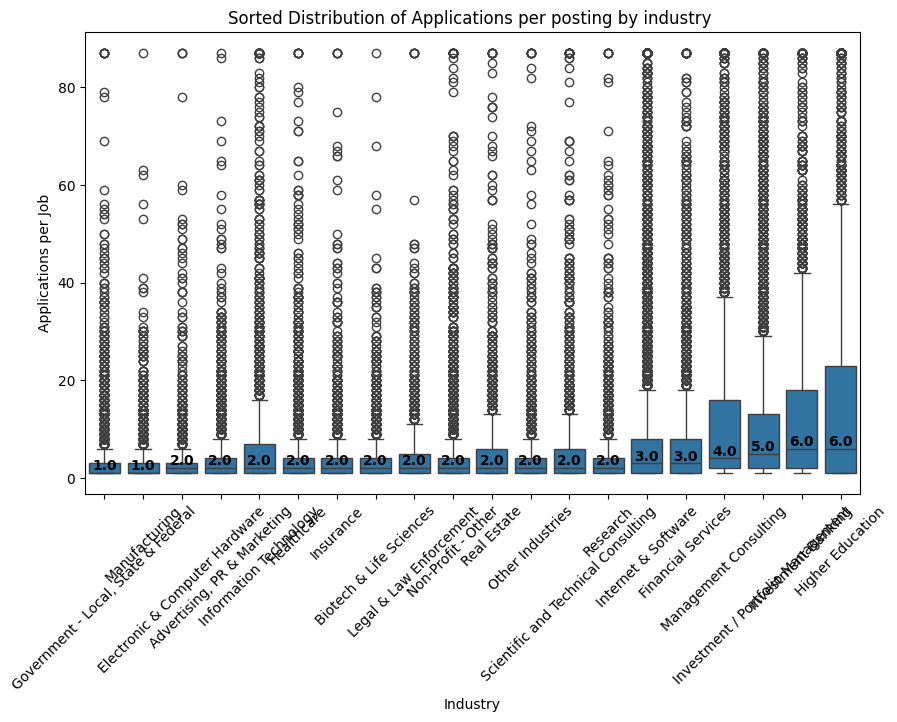

In [ ]:
# Sort industries by median applications per job for chart order
industry_order = (
    filtered_data.groupby("Employer Industry Name")["Applications for Job"]
    .median()
    .sort_values()
    .index
)

# Medians (can change to means)
medians = filtered_data.groupby("Employer Industry Name")["Applications for Job"].median()

# Cap outliers plotted at the 'outlier_cap' percentile to keep box in visuals
outlier_cap = 99
cap = np.percentile(filtered_data["Applications for Job"], outlier_cap)
filtered_data.loc[:,"Applications for Job"] = np.clip(filtered_data.loc[:, "Applications for Job"], None, cap)

# Plot The boxpolots
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=filtered_data, x="Employer Industry Name", y="Applications for Job", order=industry_order)
# Annotate medians
for i, industry in enumerate(industry_order):
    median_val = medians[industry]
    plt.text(i, median_val, f"{median_val:.1f}", ha='center', va='bottom', fontsize=10, fontweight="bold", color="black")

plt.xticks(rotation=45)
plt.xlabel("Industry")
plt.ylabel("Applications per Job")
plt.title("Sorted Distribution of Applications per posting by industry ")

plt.show()